<a href="https://colab.research.google.com/github/govardhan-06/practice-Notebooks/blob/main/pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

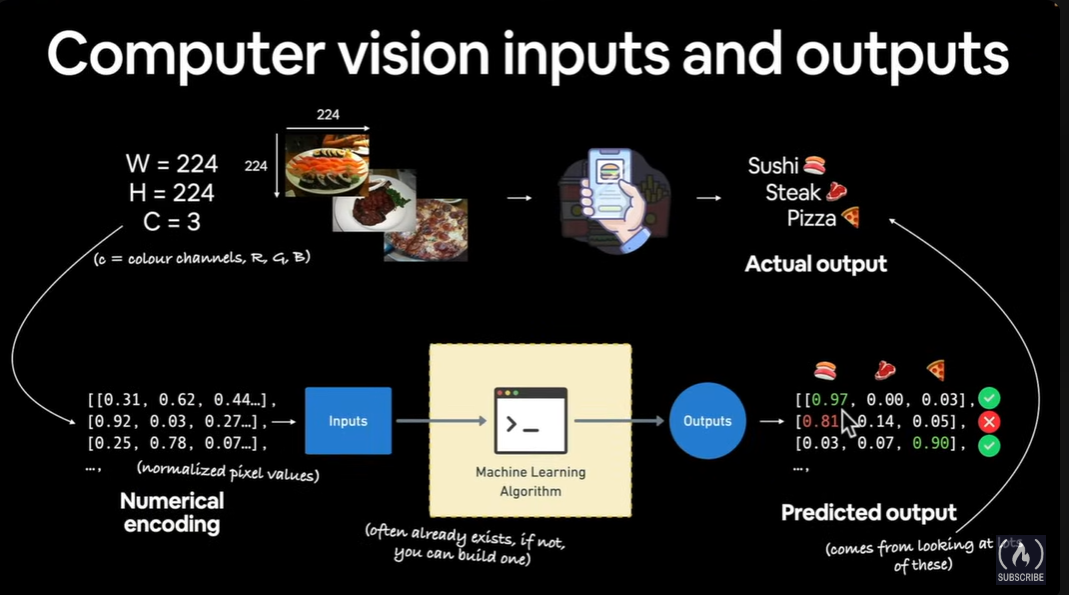

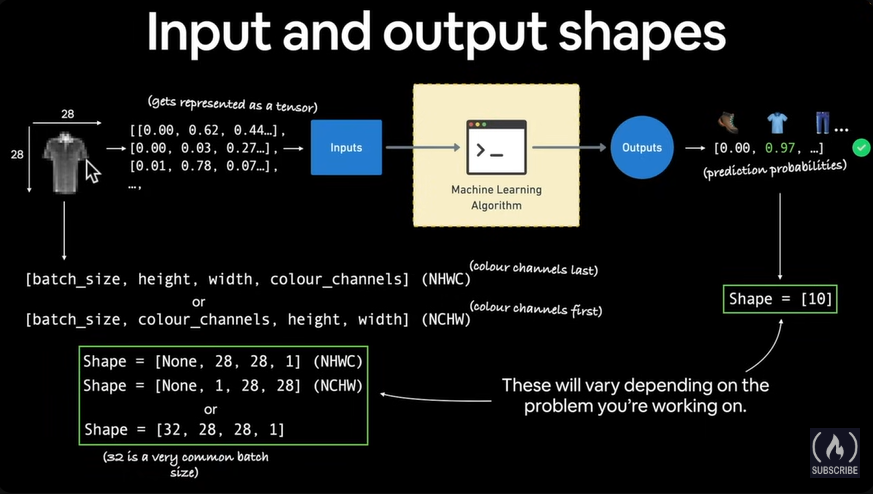

#### PyTorch Computer Vision Libraries

* `torchvision` - base library of pytorch computer vision
* `torchvision.datasets` - get datasets and data loading for computer vision
* `torchvision.models` - get pre-trained CV models
* `torchvision.transforms` - functions for manipulating your vision data for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Create Python iterable over a dataset

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.3.0+cu121
0.18.0+cu121


1. Getting a dataset

In [2]:
train_set=torchvision.datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_set=torchvision.datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 9219094.40it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 144712.83it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2803327.68it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 9927483.67it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_set),len(test_set)

(60000, 10000)

In [4]:
class_names=train_set.classes

In [5]:
train_set.class_to_idx #Returns a dictionary

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [6]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [7]:
image,label=train_set[0]

In [8]:
label

9

In [9]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

### Check the input and output of data

In [10]:
print(f"Image shape: {image.shape} -> [colour_channels,height,width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [colour_channels,height,width]
Image label: Ankle boot


* PyTorch follows colour channels first policy for representing the images wherein other frameworks use colour channel last policy

### Visualizing our data

Image shape : torch.Size([1, 28, 28])


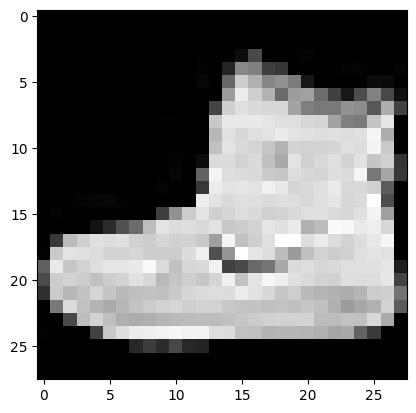

In [11]:
import matplotlib.pyplot as plt
image,label=train_set[0]
print(f"Image shape : {image.shape}")
plt.imshow(image.squeeze(),cmap='gray')

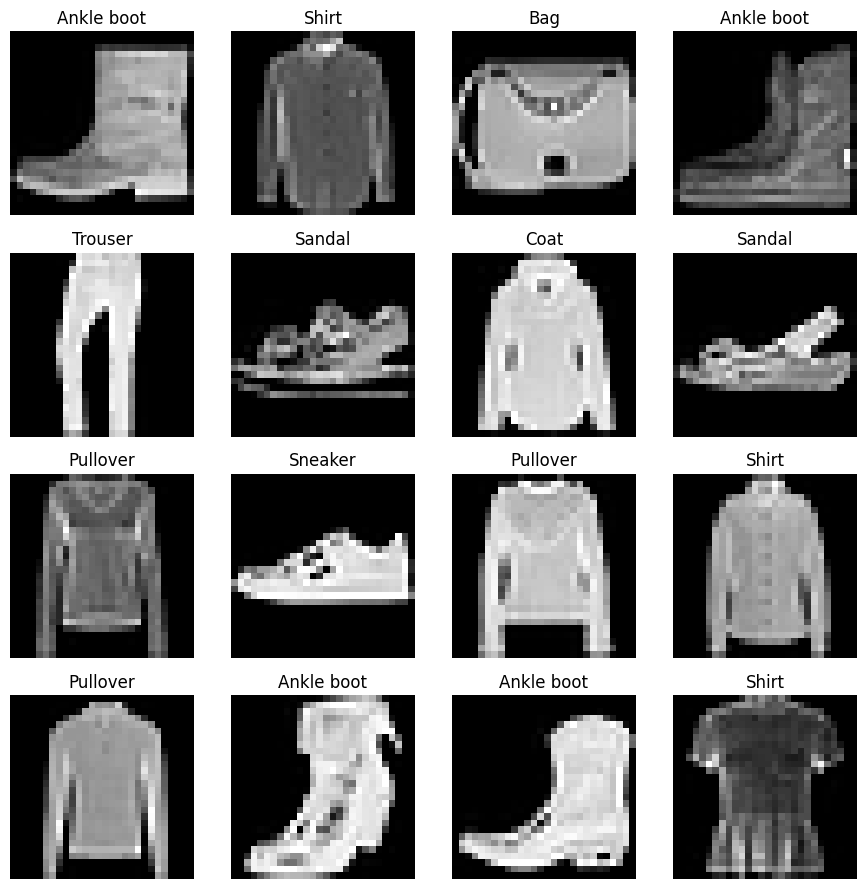

In [12]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4

for i in range(1, rows*cols + 1):
    random_idx = torch.randint(0, len(train_set), size=[1]).item()
    img, label = train_set[random_idx]
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(class_names[label])
    ax.axis('off')  # Turn off the axis

plt.tight_layout()
plt.show()

### Prepare DataLoader
* Intially the data is inform of the tensor datasets.
* Using this dataloader, the tensor.datasets will get conevrted to torch.Tensor
* batches: we will be dividing the train data to batches and it will be loaded one by one. This reduces the compute resource and the reve,

In [13]:
from torch.utils.data import DataLoader

BATCH_SIZE=32
train_dataloader=DataLoader(train_set,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader=DataLoader(test_set,batch_size=BATCH_SIZE,shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f96a5aa1480>,
 <torch.utils.data.dataloader.DataLoader at 0x7f96a5aa3760>)

In [14]:
print(f"DataLoaders: {train_dataloader,test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f96a5aa1480>, <torch.utils.data.dataloader.DataLoader object at 0x7f96a5aa3760>)
Length of train dataloader: 1875 batches of 32...
Length of test dataloader: 313 batches of 32...


In [15]:
#What's in the dataloader
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


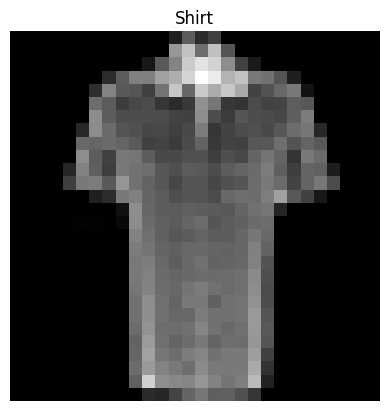

In [16]:
#Show a sample
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis('off')
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

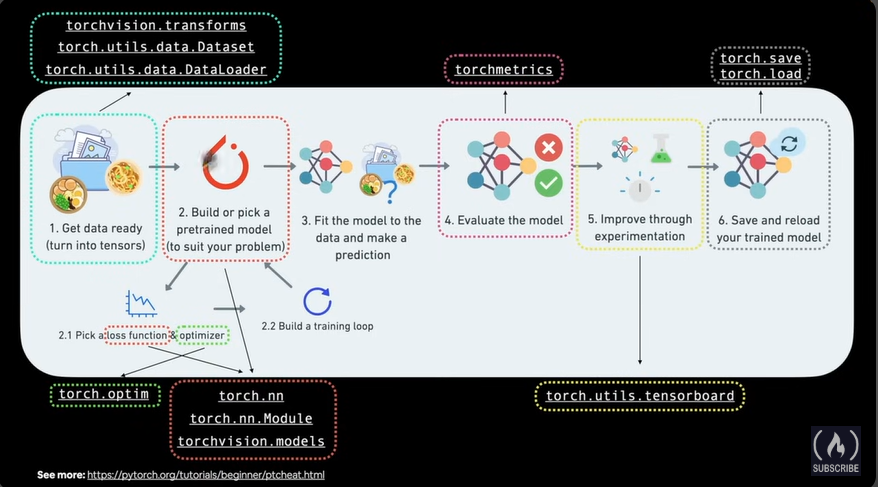

### Model 0 - Baseline model

In [17]:
#Create a flatten layer
flatten_model=nn.Flatten()

#Get a single sample
x=train_features_batch[0]

#Flatten the sample
output=flatten_model(x)

#Check the shape of the output
print(f"Shape before flattening: {x.shape} -> (color_channels,height,weight)")
print(f"Shape after flattening: {output.shape} -> (color_channels,height*weight)")

Shape before flattening: torch.Size([1, 28, 28]) -> (color_channels,height,weight)
Shape after flattening: torch.Size([1, 784]) -> (color_channels,height*weight)


In [18]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [19]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [20]:
torch.manual_seed(42)

model_0=FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [22]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [23]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

### Model Performance

In [24]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [25]:
start_time=timer()
##some code...
end_time=timer()
print_train_time(start=start_time, end=end_time, device=str(next(model_0.parameters()).device))

Train time on cpu: 0.000 seconds


5.28030000026547e-05

### Creating a training loop and training and training a model on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out what's happening
5. Timer

In [26]:
next(iter(train_dataloader.dataset))

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [27]:
#tqdm for progress bar
from tqdm.auto import tqdm

#helper function
from helper_functions import accuracy_fn

torch.manual_seed(42)
train_time_on_cpu=timer()

epochs=3

#Training and Testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  ### Training
  train_loss=0
  #Managing the batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    #1. Forward pass
    y_pred=model_0(X)

    #2. Calculate the loss
    loss=loss_fn(y_pred, y)
    train_loss+=loss
    #train loss is getting accumulated based on each batch

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. Optimizer step
    optimizer.step()

    #6. Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  #Testing
  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:

      #1.Forward pass
      test_preds=model_0(X_test)

      #2.Calculate the loss
      test_loss+=loss_fn(test_preds, y_test)

      #3.Calculate the accuracy
      test_acc+=accuracy_fn(y_true=y_test, y_pred=test_preds.argmax(dim=1))

    #Calculate the test loss average per batch
    test_loss/=len(test_dataloader)
    test_acc/=len(test_dataloader)

  #Print the train and test loss
  print(f"\nTrain loss: {train_loss/len(train_dataloader):.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

  #Calculate the training time
  train_time_model_0=print_train_time(start=start_time, end=timer(), device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Train time on cpu: 10.725 seconds
Epoch: 1
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Train time on cpu: 20.046 seconds
Epoch: 2
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 29.380 seconds


### Making predictions

In [28]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn):
  """Returns the model results in a dictionary"""
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      #Putting the data on to a same device
      X,y=X.to(device),y.to(device)
      model.to(device)

      #Make predictions
      y_pred=model(X)

      #Calculate the loss
      loss+=loss_fn(y_pred, y)

      #Calculate the accuracy
      acc+=accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    #Calculate the average loss and accuracy
    loss/=len(data_loader)
    acc/=len(data_loader)

  return{"model_name":model.__class__.__name__ , #applicable only for models created using a class
         "model_loss":loss.item(),
         "model_acc":acc
         }

model_results=eval_model(
    model=model_0,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_results


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [29]:
device

'cuda'

### Model 1: with non-linear functions

In [30]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
                input_shape:int,
                hidden_units:int,
                output_shape:int
                ):
     super().__init__()
     self.layer_stack=nn.Sequential(
         nn.Flatten(), #flatten the input vectors into a single vector
         nn.Linear(in_features=input_shape, out_features=hidden_units),
         nn.ReLU(),
         nn.Linear(in_features=hidden_units, out_features=output_shape),
         nn.ReLU()
     )
  def forward(self, x:torch.Tensor):
      return self.layer_stack(x)

In [31]:
device

'cuda'

In [32]:
torch.manual_seed(42)
model_1=FashionMNISTModelV1(input_shape=784,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [33]:
!nvidia-smi

Sun Jun 23 03:41:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0              27W /  70W |    151MiB / 15360MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [34]:
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### Training loop and testing loop

In [35]:
from tqdm.auto import tqdm
def train_step(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device
               ): #training loop
    '''Perform a training with model trying to learn on data_loader'''

    train_loss,train_acc=0,0
    model.train()

    #Managing the batches
    for batch, (X, y) in enumerate(train_dataloader):

      #Putting data onto the target device
      X,y=X.to(device),y.to(device)

      #1. Forward pass
      y_pred=model(X)

      #2. Calculate the loss
      loss=loss_fn(y_pred, y)
      train_loss+=loss
      #train loss is getting accumulated based on each batch
      train_acc+=accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

      #3. Optimizer zero grad
      optimizer.zero_grad()

      #4. Loss backward
      loss.backward()

      #5. Optimizer step
      optimizer.step()

    train_loss/=len(train_dataloader)
    train_acc/=len(train_dataloader)

    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [36]:
def test_step(model:torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device=device):
  '''Perform a testing with model trying to learn on data_loader'''
  test_loss,test_acc=0,0

  model.eval()

  with torch.inference_mode():
    for X,y in data_loader:
      #Putting data onto the target device
      X,y=X.to(device),y.to(device)

      #1. Forward pass
      test_pred=model(X)

      #2. Calculate the loss and accuracy
      test_loss+=loss_fn(test_pred, y)
      test_acc+=accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    test_loss/=len(data_loader)
    test_acc/=len(data_loader)

    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

In [37]:
torch.cuda.manual_seed(42)
epochs=5
start_time=timer()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(
      model=model_1,
      data_loader=train_dataloader,
      loss_fn=loss_fn,
      optimizer=optimizer,
      accuracy_fn=accuracy_fn,
      device=device
  )
  test_step(
      model=model_1,
      data_loader=test_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device=device
  )

total_train_time_model_1=print_train_time(start=start_time, end=timer(), device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.05878 | Train acc: 62.19%
Test loss: 0.99506 | Test acc: 64.13%
Epoch: 1
---------
Train loss: 0.91331 | Train acc: 66.40%
Test loss: 0.90508 | Test acc: 66.86%
Epoch: 2
---------
Train loss: 0.87982 | Train acc: 67.24%
Test loss: 0.89476 | Test acc: 66.46%
Epoch: 3
---------
Train loss: 0.86308 | Train acc: 67.59%
Test loss: 0.90772 | Test acc: 66.34%
Epoch: 4
---------
Train loss: 0.84894 | Train acc: 68.08%
Test loss: 0.86968 | Test acc: 67.33%
Train time on cuda: 61.516 seconds


In [38]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [39]:
model_1_results=eval_model(
    model=model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.8696814179420471,
 'model_acc': 67.33226837060703}

### Convolutional Neural Network

* CNN's are also known as CovNets
* CNN's are known for their capabilities to find patterns in visual data
* CNN explainer website: https://poloclub.github.io/cnn-explainer/

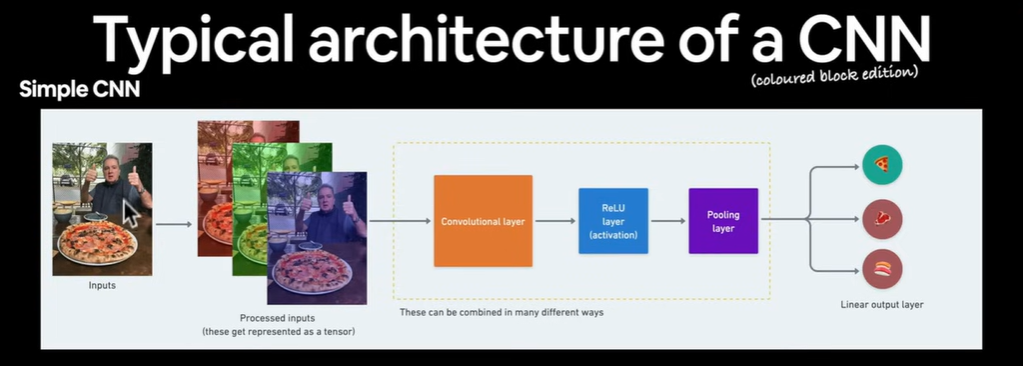

In [40]:
class FashionMNISTModelV2(nn.Module):
  '''
  Here we are building the neural network that is present in the CNN Explainer website
  Model to be replicated is TinyVGG
  '''
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

* `input shape` is the number of color channels of the image

In [41]:
torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1,hidden_units=10,output_shape=10)

In [42]:
test_batch=torch.rand([32,3,64,64])
test_batch

tensor([[[[0.1864, 0.7294, 0.5354,  ..., 0.5492, 0.0344, 0.6408],
          [0.2555, 0.1222, 0.2993,  ..., 0.1025, 0.0051, 0.4813],
          [0.6474, 0.2053, 0.8934,  ..., 0.0936, 0.5672, 0.3089],
          ...,
          [0.3974, 0.4522, 0.3594,  ..., 0.6474, 0.1301, 0.0709],
          [0.1341, 0.9047, 0.1645,  ..., 0.0250, 0.3867, 0.4522],
          [0.8581, 0.4958, 0.6895,  ..., 0.9223, 0.6003, 0.8415]],

         [[0.0634, 0.5660, 0.9669,  ..., 0.6836, 0.3126, 0.4321],
          [0.5317, 0.9469, 0.8746,  ..., 0.3124, 0.3441, 0.6122],
          [0.8539, 0.3364, 0.4146,  ..., 0.2116, 0.4786, 0.8728],
          ...,
          [0.8372, 0.7806, 0.1906,  ..., 0.0859, 0.6138, 0.1119],
          [0.8947, 0.3029, 0.6021,  ..., 0.2203, 0.3237, 0.5624],
          [0.2022, 0.9473, 0.2036,  ..., 0.9000, 0.9285, 0.6965]],

         [[0.3733, 0.2127, 0.3968,  ..., 0.4449, 0.5642, 0.8521],
          [0.5600, 0.5585, 0.7470,  ..., 0.3422, 0.3608, 0.2269],
          [0.4902, 0.3923, 0.4057,  ..., 0

In [43]:
test_image=test_batch[0]
test_image.shape

torch.Size([3, 64, 64])

### `nn.Conv2d()`

In [44]:
torch.manual_seed(42)
conv_layer=nn.Conv2d(in_channels=3,out_channels=10,kernel_size=3,stride=1,padding=1)
conv_output=conv_layer(test_image.unsqueeze(dim=0))
conv_output.shape

torch.Size([1, 10, 64, 64])

### `nn.MaxPool2d()`

In [45]:
print(test_image.shape)
max_pool_layer=nn.MaxPool2d(kernel_size=2)
conv_output_trans=conv_layer(test_image.unsqueeze(dim=0))
print(conv_output_trans.shape)
test_image_trans=max_pool_layer(conv_output_trans)
print(test_image_trans.shape)

torch.Size([3, 64, 64])
torch.Size([1, 10, 64, 64])
torch.Size([1, 10, 32, 32])


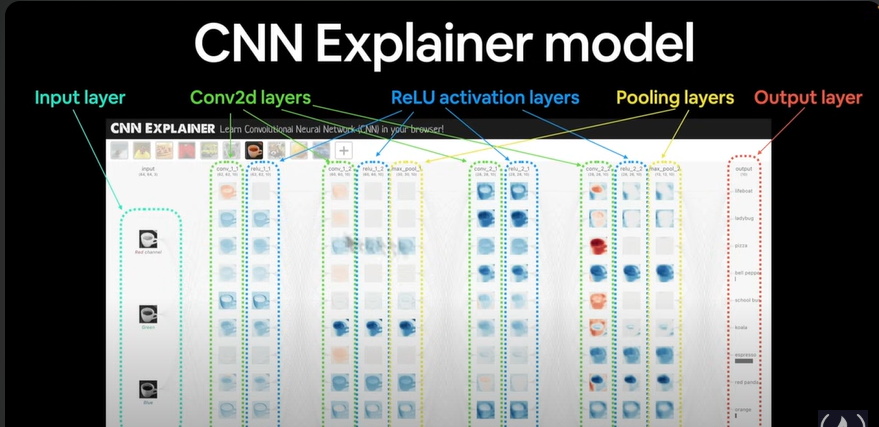

### Training a CNN

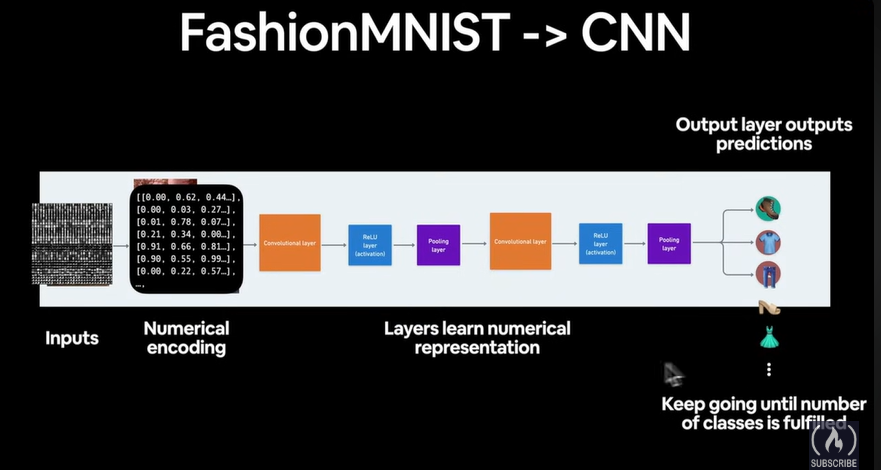

In [46]:
#Setup loss and accuracy function
from helper_functions import accuracy_fn

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.1)
accuracy_fn=accuracy_fn

In [47]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Measuring compute time
from timeit import default_timer as timer
train_time_start=timer()

#Start the training
epochs=5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(model=model_2.to(device),
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device
    )
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device
    )
train_time_end=timer()
total_train_time=print_train_time(start=train_time_start,
                            end=train_time_end,
                            device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59549 | Train acc: 78.40%
Test loss: 0.39192 | Test acc: 85.92%
Epoch: 1
---------
Train loss: 0.35876 | Train acc: 87.11%
Test loss: 0.35344 | Test acc: 86.77%
Epoch: 2
---------
Train loss: 0.32263 | Train acc: 88.36%
Test loss: 0.32147 | Test acc: 88.22%
Epoch: 3
---------
Train loss: 0.30173 | Train acc: 89.07%
Test loss: 0.31867 | Test acc: 88.36%
Epoch: 4
---------
Train loss: 0.28647 | Train acc: 89.53%
Test loss: 0.31162 | Test acc: 88.65%
Train time on cuda: 63.389 seconds


In [48]:
model_2_results=eval_model(model=model_2,
                      data_loader=test_dataloader,
                      loss_fn=loss_fn,
                      accuracy_fn=accuracy_fn)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31162029504776,
 'model_acc': 88.64816293929712}

In [49]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.8696814179420471,
 'model_acc': 67.33226837060703}

In [50]:
model_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

Text(0, 0.5, 'model')

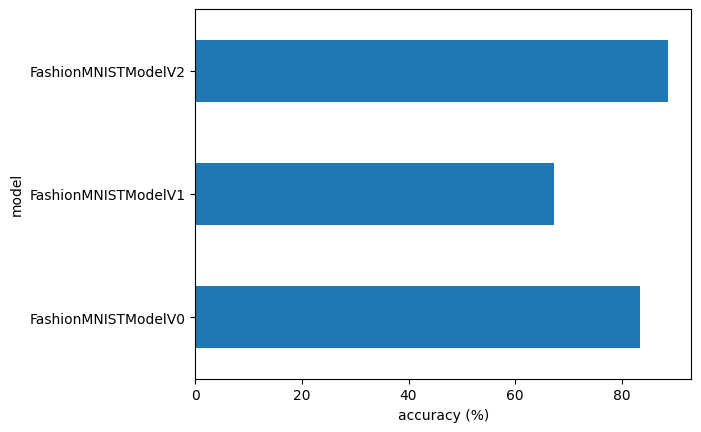

In [51]:
#Visualize our model results
import pandas as pd
results = [model_results, model_1_results, model_2_results]

# Create a DataFrame from the list
compare_results = pd.DataFrame(results)

compare_results.set_index('model_name')["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

### Making predictions

In [61]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
    pred_probs=[]
    model.eval()
    with torch.inference_mode():
      for sample in data:
        #Prepare the sample
        sample=torch.unsqueeze(sample,dim=0).to(device)

        #Forward pass
        pred_logit=model(sample.to(device))

        #Get prediction probability
        pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)

        #Get the pred_probs out of GPU for further calc
        pred_probs.append(pred_prob.cpu())
    #Converting list to tensor
    return torch.stack(pred_probs)

In [62]:
test_set

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [70]:
import random
random.seed(2)
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(test_set),k=64):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

In [71]:
#Make predicitions
pred_probs=make_predictions(model=model_2,
                           data=test_samples)
#View first two prediction probabilities
pred_probs[:2]

tensor([[7.2402e-01, 8.1488e-06, 1.8502e-04, 1.1917e-03, 1.0963e-03, 7.2027e-08,
         2.7343e-01, 9.8210e-07, 6.4303e-05, 1.6481e-07],
        [3.5282e-03, 5.7208e-06, 4.1762e-04, 9.8125e-01, 1.0863e-03, 4.6703e-07,
         1.3703e-02, 7.1817e-08, 9.9041e-06, 1.0021e-06]])

In [72]:
#Probabilities to prediction labels
pred_classes=pred_probs.argmax(dim=1)
pred_classes

tensor([0, 3, 3, 7, 1, 7, 0, 3, 0, 5, 2, 3, 6, 1, 6, 7, 8, 2, 4, 4, 3, 5, 5, 3,
        9, 8, 2, 3, 8, 6, 0, 6, 5, 1, 6, 1, 3, 3, 8, 0, 5, 9, 6, 8, 0, 2, 9, 7,
        3, 2, 6, 2, 2, 1, 7, 8, 0, 3, 5, 9, 7, 9, 1, 5])

In [73]:
test_labels

[0,
 3,
 3,
 7,
 1,
 7,
 0,
 3,
 3,
 5,
 4,
 3,
 6,
 1,
 4,
 7,
 8,
 2,
 2,
 4,
 3,
 5,
 5,
 3,
 9,
 8,
 2,
 3,
 8,
 6,
 6,
 6,
 5,
 1,
 6,
 1,
 1,
 3,
 8,
 0,
 5,
 9,
 2,
 8,
 6,
 2,
 9,
 9,
 3,
 2,
 6,
 2,
 6,
 1,
 7,
 8,
 0,
 3,
 5,
 9,
 7,
 9,
 1,
 5]

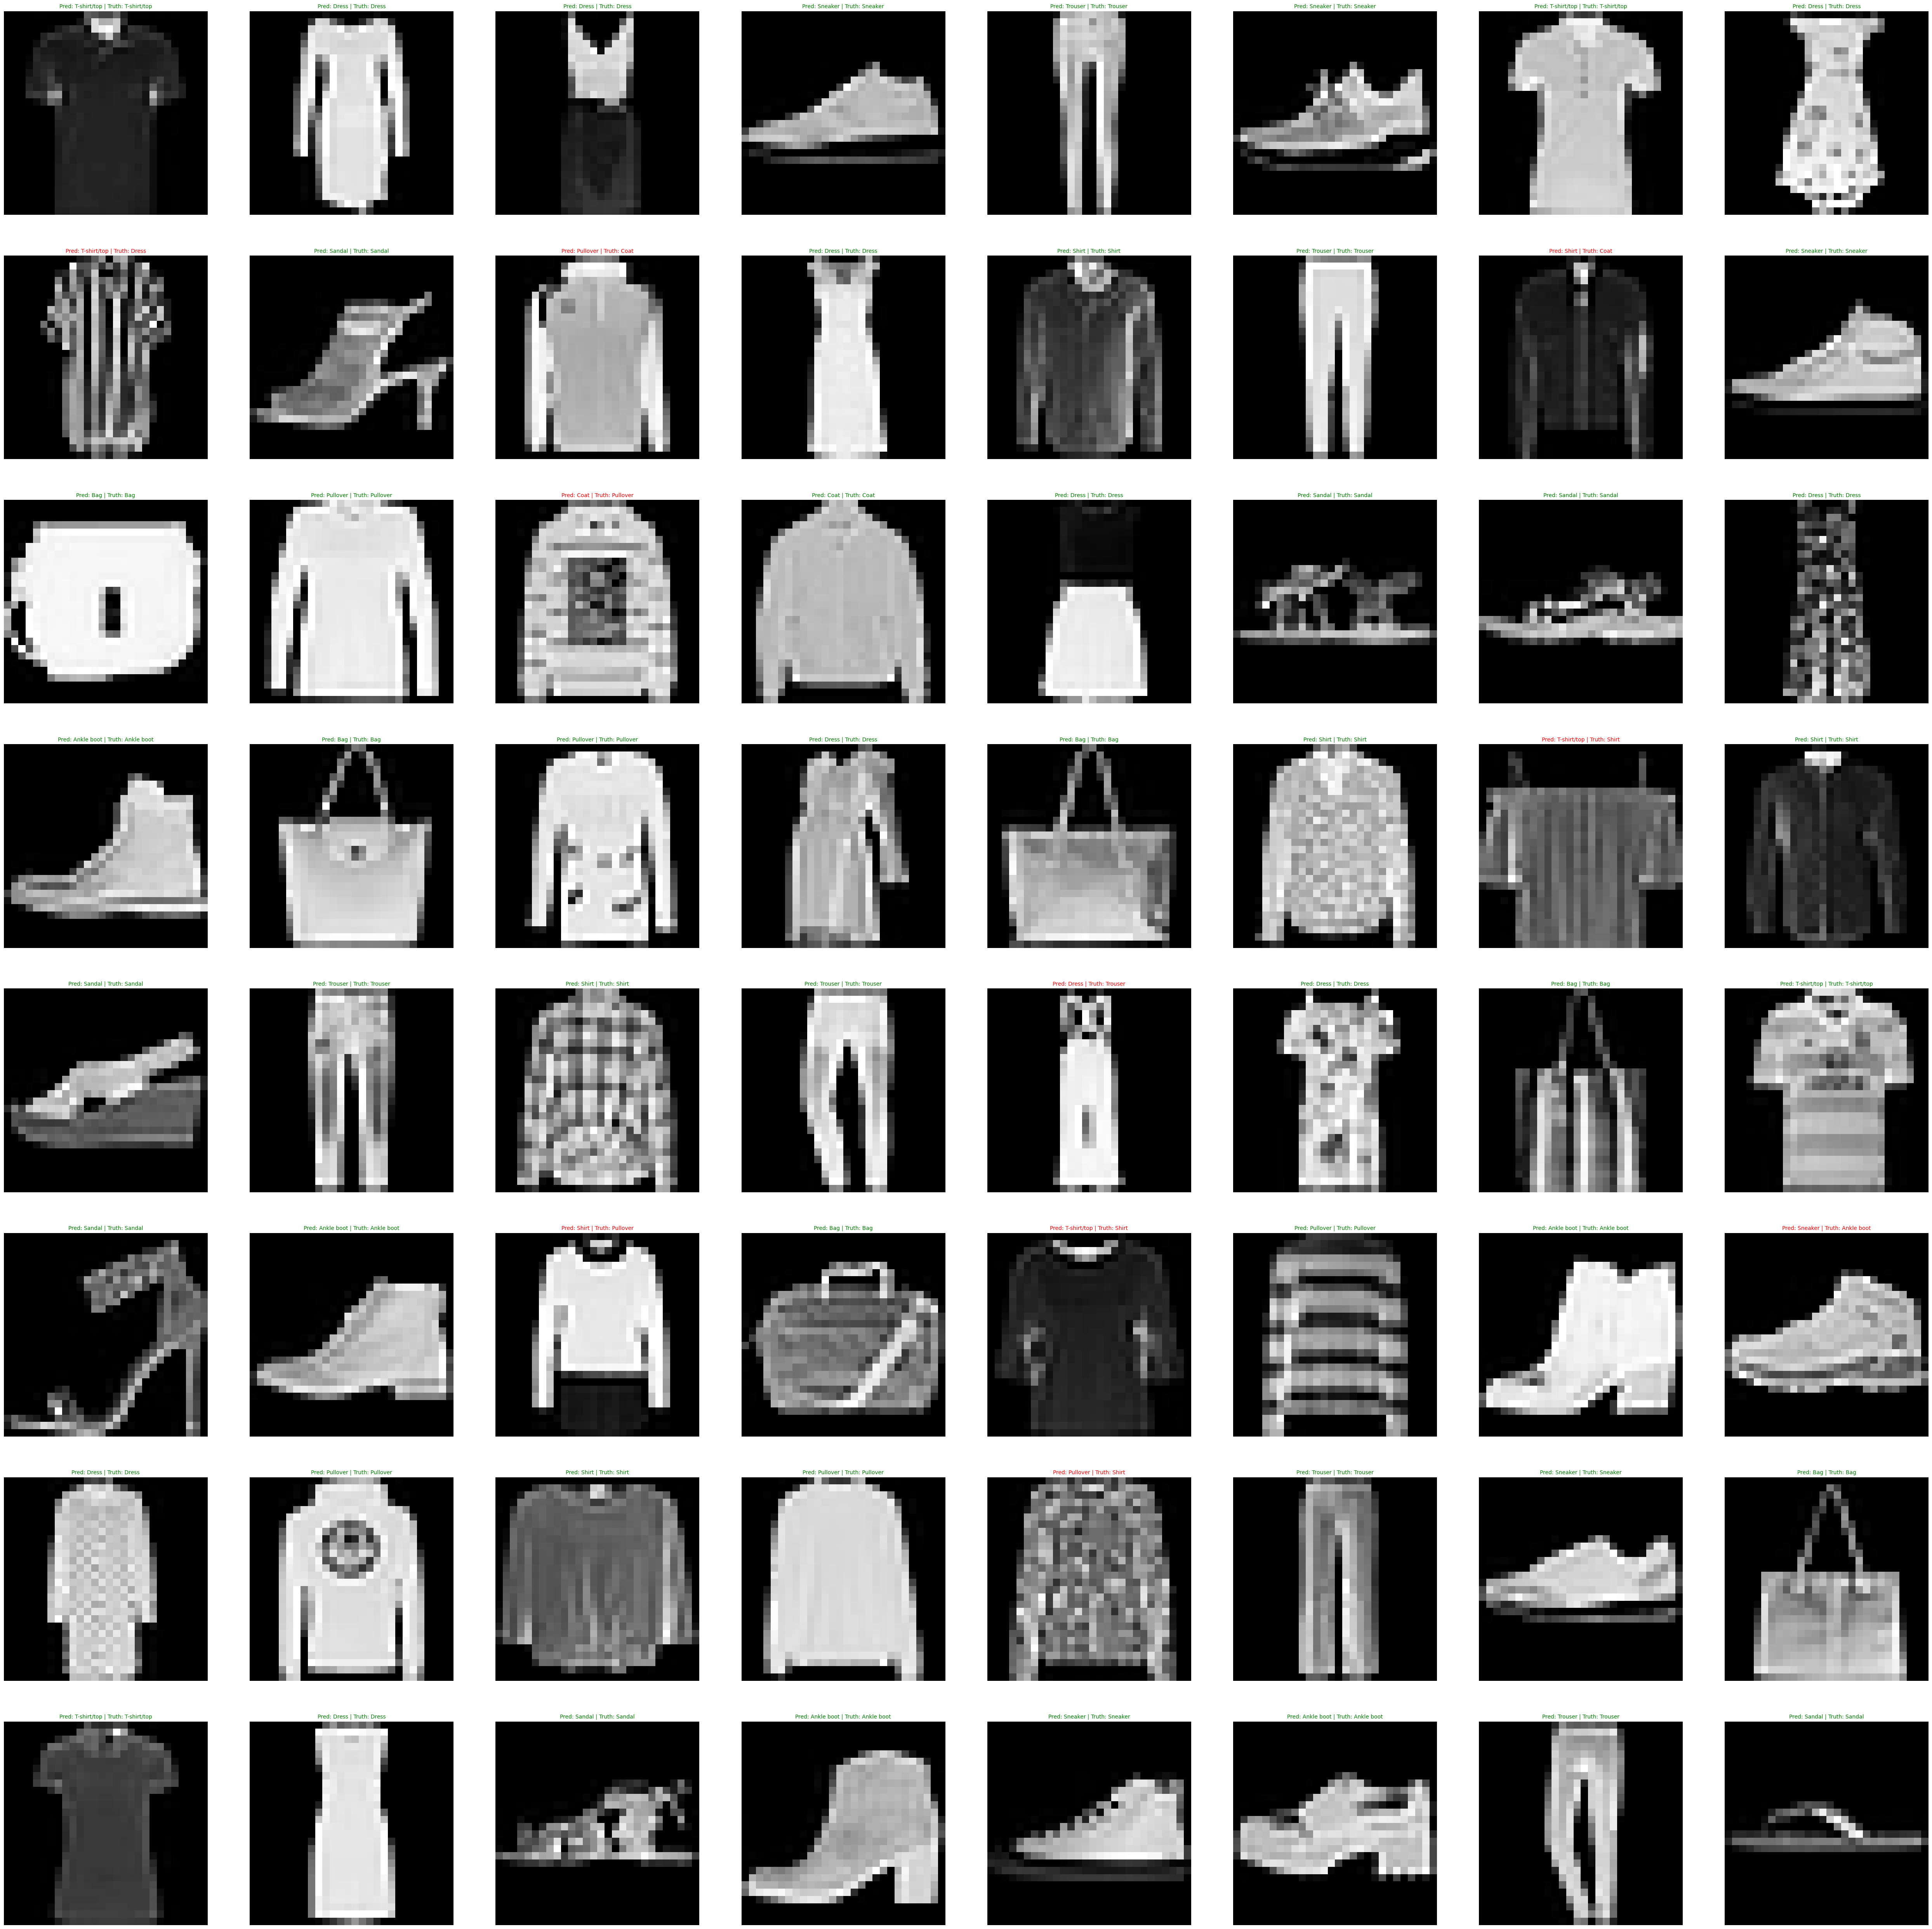

In [74]:
#Plot predictions
plt.figure(figsize=(64,64))
nrows=8
ncols=8
for i,sample in enumerate(test_samples):
  #Create subplot
  plt.subplot(nrows,ncols,i+1)

  #Plot the target image
  plt.imshow(sample.squeeze(),cmap="gray")

  #Find the prediction
  pred_label=class_names[pred_classes[i]]

  #Get the truth label (in text form)
  truth_label=class_names[test_labels[i]]

  #Create a title for the plot
  title_text=f"Pred: {pred_label} | Truth: {truth_label}"

  #Check for equality
  if pred_label==truth_label:
    plt.title(title_text,fontsize=10,c="g")
  else:
    plt.title(title_text,fontsize=10,c="r")
  plt.axis('off')

### Evaluating model using torchmetrics

In [75]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 18.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [78]:
!pip install mlxtend

In [81]:
import mlxtend
mlxtend.__version__

'0.22.0'